In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [3]:
img_width,img_height=48,48

In [4]:
training_generator=ImageDataGenerator(
    rescale=1.255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True
)

In [5]:
training_set=training_generator.flow_from_directory(
    "/content/drive/MyDrive/RockPaperScissor/rps/",
    color_mode='rgb',
    target_size=(img_width,img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 2540 images belonging to 3 classes.


In [6]:
validation_generator=ImageDataGenerator(
    rescale=1.255
)

In [7]:
validation_set=validation_generator.flow_from_directory(
    "/content/drive/MyDrive/RockPaperScissor/rps-test-set/",
    color_mode='rgb',
    target_size=(img_width,img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 372 images belonging to 3 classes.


In [8]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(48,48,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
# model.add(Dense(128))
model.add(Dense(3,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [10]:
history=model.fit(training_set,validation_data=(validation_set),epochs=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 1486s 17s/step - accuracy: 0.3439 - loss: 36.7074 - val_accuracy: 0.3898 - val_loss: 1.0667
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 71s 382ms/step - accuracy: 0.4646 - loss: 1.0215 - val_accuracy: 0.7608 - val_loss: 0.4907
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 32s 377ms/step - accuracy: 0.7129 - loss: 0.6478 - val_accuracy: 0.7634 - val_loss: 0.5536
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 43s 395ms/step - accuracy: 0.7837 - loss: 0.5374 - val_accuracy: 0.8414 - val_loss: 0.4137
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 32s 375ms/step - accuracy: 0.7989 - loss: 0.4891 - val_accuracy: 0.8656 - val_loss: 0.2815
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 35s 413ms/step - accuracy: 0.8425 - loss: 0.3905 - val_accuracy: 0.8817 - val_loss: 0.3705
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 403ms/step - accuracy: 0.8640 - loss: 0.3573 - val_accuracy: 0.8844 - val_loss: 0.1916
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 33s 386ms/step - accuracy: 0.8488 - loss: 0.4008 - val_accuracy: 0.95

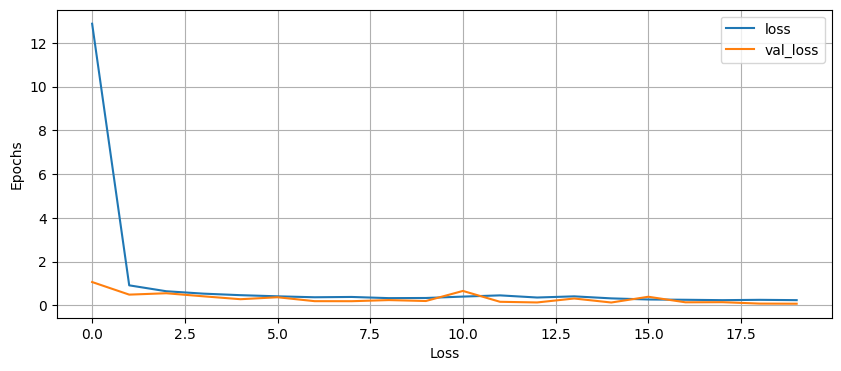

In [11]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.grid()
plt.show()

In [21]:
import tensorflow as tf

tf.keras.models.save_model(model,'cnn.keras')

In [22]:
class_indices = training_set.class_indices
print("Class Indices:", class_indices)
class_labels = list(class_indices.keys())
print("Class Labels:", class_labels)


Class Indices: {'paper': 0, 'rock': 1, 'scissors': 2}
Class Labels: ['paper', 'rock', 'scissors']


Saving testrock01-23.png to testrock01-23.png
File testrock01-23.png successfully uploaded.


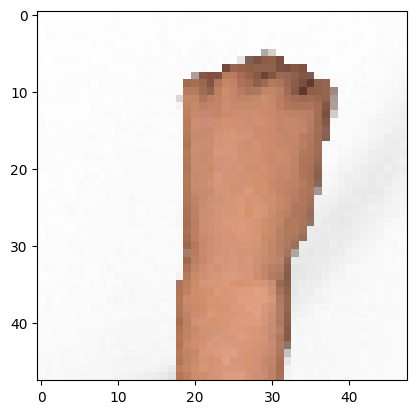

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Class: rock


In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import load_model  # Tambahkan import untuk load_model


# Memuat model yang sudah dilatih
model_path = 'cnn.keras'  # Sesuaikan dengan path model Anda
model = load_model(model_path)

uploaded = files.upload()

for filename in uploaded.keys():
    print(f'File {filename} successfully uploaded.')

# Ambil nama file gambar yang diunggah (mungkin perlu disesuaikan sesuai dengan nama file yang Anda unggah)
uploaded_image_path = list(uploaded.keys())[0]

# Load dan praproses gambar
img = image.load_img(uploaded_image_path, target_size=(48, 48))
img_array = image.img_to_array(img)
img_array /= 255.0  # Normalisasi nilai piksel

# Tampilkan gambar yang diuji
plt.imshow(img)
plt.show()

# Ubah gambar menjadi bentuk yang dapat digunakan oleh model
input_image = np.expand_dims(img_array, axis=0)

# Lakukan prediksi
predictions = model.predict(input_image)

# Dapatkan label kelas prediksi
predicted_class = np.argmax(predictions)

# Misalnya, jika Anda memiliki file label seperti label_names
label_names = ['paper','rock','scissors']
predicted_label = label_names[predicted_class]

# Tampilkan hasil prediksi
print(f'Predicted Class: {predicted_label}')